# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [19]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [36]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.zeros((n+1,self.ndim))
        
        # YOUR CODE HERE
        for i in range(n+1):
            positions[i] = self.pos
            self.pos = self.pos + self.pickStep()
        
        return positions

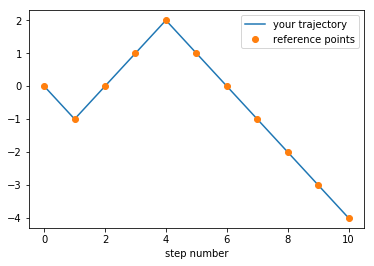

In [37]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

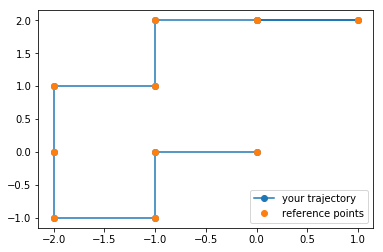

In [38]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

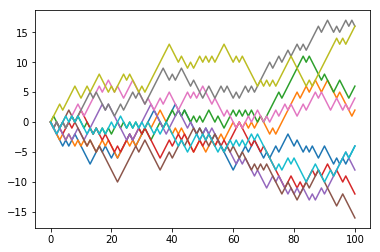

In [39]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


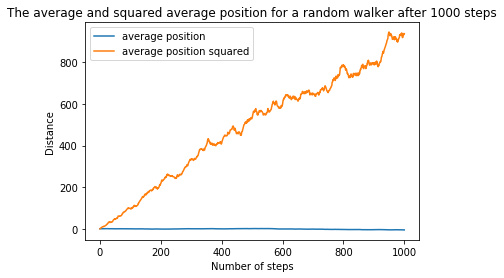

In [41]:
nsteps = 1000
ndim = 1
nwalkers = 100
#mycode:

position1 = numpy.zeros((nsteps+1, nwalkers))
for i in range(nwalkers):
    walk = walker(numpy.zeros(ndim))
    position1[:,i] = walk.doSteps(nsteps).T
    
average_pos = numpy.zeros(nsteps+1)
average_squared = numpy.zeros(nsteps + 1)
for i in range(nsteps+1):
    average_pos[i] = numpy.average(position1[i,:])
    average_squared[i] = numpy.average(position1[i,:]**2)
    
#plot
xvalues = numpy.linspace(0,nsteps,nsteps+1)    
plt.plot(xvalues, average_pos, label = "average position")
plt.plot(xvalues, average_squared, label = "average position squared")
plt.ylabel("Distance")
plt.xlabel("Number of steps")
plt.title("The average and squared average position for a random walker after 1000 steps")
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


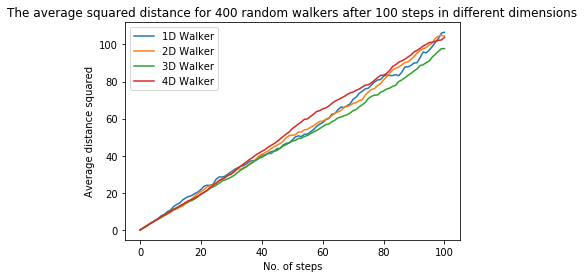

In [44]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

#my code:

def distance_sqared(n_step, walkers, dim):
    dsquared = numpy.zeros([walkers,n_step + 1])
    
    for i in range(0,walkers):
        walk = walker(numpy.zeros(ndim), ndim = dim)   #
        positions2 = walk.doSteps(n_step)
    
        for j in range(n_step + 1):
            slice_p = positions2[j,:]
            slice_squared = numpy.square(slice_p)
            dsquared[i,j]=numpy.sum(slice_squared)
        dsquared_av = numpy.zeros(n_step + 1)
        
        for l in range(n_step + 1):
            dsquared_av[l] = numpy.average(dsquared[:,l])
            
    return dsquared_av

xval = numpy.linspace(0,nsteps,nsteps+1)

for m in dimensions:
    yval = distance_sqared(nsteps, nwalkers, m)
    dim_no = m 
    plt.plot(xval, yval, label= "{}D Walker".format(dim_no))

plt.title("The average squared distance for 400 random walkers after 100 steps in different dimensions")
plt.ylabel("Average distance squared")
plt.xlabel("No. of steps")  
plt.legend()    

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


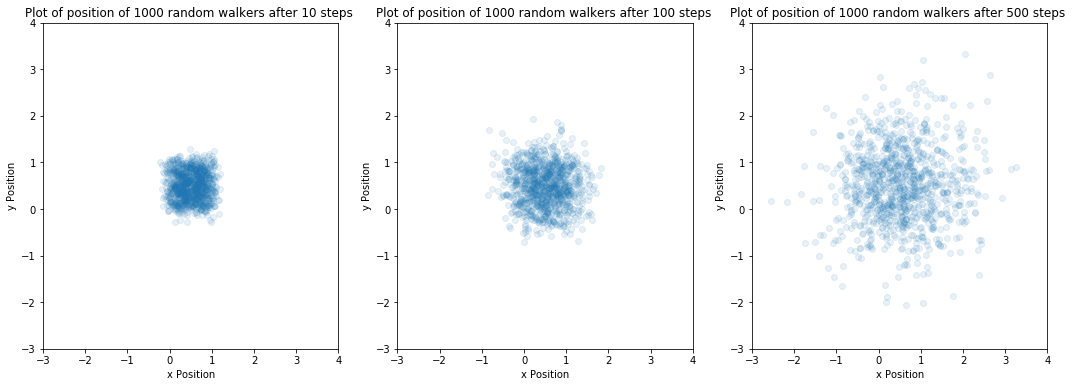

In [51]:
ndim=2
nwalkers=1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))

for i, nsteps in enumerate([10,100,500]):
    #my code:
    final_position = numpy.zeros([nwalkers, ndim])
    for j in range(nwalkers):
        walk = walker(rand_pos[j,:],ndim, step_size=0.05)
        position3 = walk.doSteps(nsteps)
        final_position[j,:] = position3[-1]
    
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.ylabel("y Position")
    plt.xlabel("x Position")
    plt.title("Plot of position of 1000 random walkers after {} steps ".format(nsteps))    
    plt.scatter(final_position[:,0], final_position[:,1], alpha=0.1)